# Assignment 5- Decision Trees

# Problem Statement-

Every year many students give the GRE exam to get admission in foreign Universities. The data
set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5),
Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5),
Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes).
Admitted is the target variable.
Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)Data
Set : https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
decisions build a machine learning model classifier using Decision tree to predict whether a
student will get admission or not.
A.Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if
necessary.
B.Perform data-preparation (Train-Test Split)
C. Apply Machine Learning Algorithm
D. Evaluate Model.


# Importing python libraries

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *

# loading the csv file into a dataframe

In [12]:
A=pd.read_csv(r"C:\Users\HP\Desktop\Admission_Predict.csv")
A

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


# head() function used to access the first n rows of a dataframe

In [13]:
A.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# describe() function returns the description of data in dataframe

In [14]:
A.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [15]:
A.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# counting the total number of null values in each column

In [16]:
A.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Dropping the column "Serial No"

In [17]:

A.drop('Serial No.',axis=1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# Assigning the independent variable

In [18]:
x=A[["GRE Score","TOEFL Score", "University Rating" ,"SOP","LOR","CGPA","Research"]]

# Changing the values of column "Chance of Admit" to 0 and 1

In [20]:
A["Chance of Admit "]=A["Chance of Admit "].apply(lambda x : 1 if x >=0.5 else 0)
A["Chance of Admit "]

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: Chance of Admit , Length: 400, dtype: int64

In [21]:
y=A["Chance of Admit "]
y

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: Chance of Admit , Length: 400, dtype: int64

# Dividing the dataset into training and testing data

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# creating the object using DecisionTreeClassifier class and fitting the model

In [24]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="gini").fit(x_train,y_train)
x_pred=model.predict(x_test)
x_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']

# creating decision tree

[Text(0.4659090909090909, 0.9375, 'CGPA <= 7.665\ngini = 0.133\nsamples = 320\nvalue = [23, 297]\nclass = 1'),
 Text(0.18181818181818182, 0.8125, 'GRE Score <= 301.0\ngini = 0.476\nsamples = 23\nvalue = [14, 9]\nclass = 0'),
 Text(0.09090909090909091, 0.6875, 'LOR  <= 2.75\ngini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = 0'),
 Text(0.045454545454545456, 0.5625, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = 0'),
 Text(0.13636363636363635, 0.5625, 'SOP <= 2.75\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = 0'),
 Text(0.09090909090909091, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.18181818181818182, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.2727272727272727, 0.6875, 'TOEFL Score <= 97.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = 1'),
 Text(0.22727272727272727, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.3181818181818182, 0.5625, 'CGPA <= 7.655\ngini = 0.346\nsamples = 9\nvalue = [2, 7]\

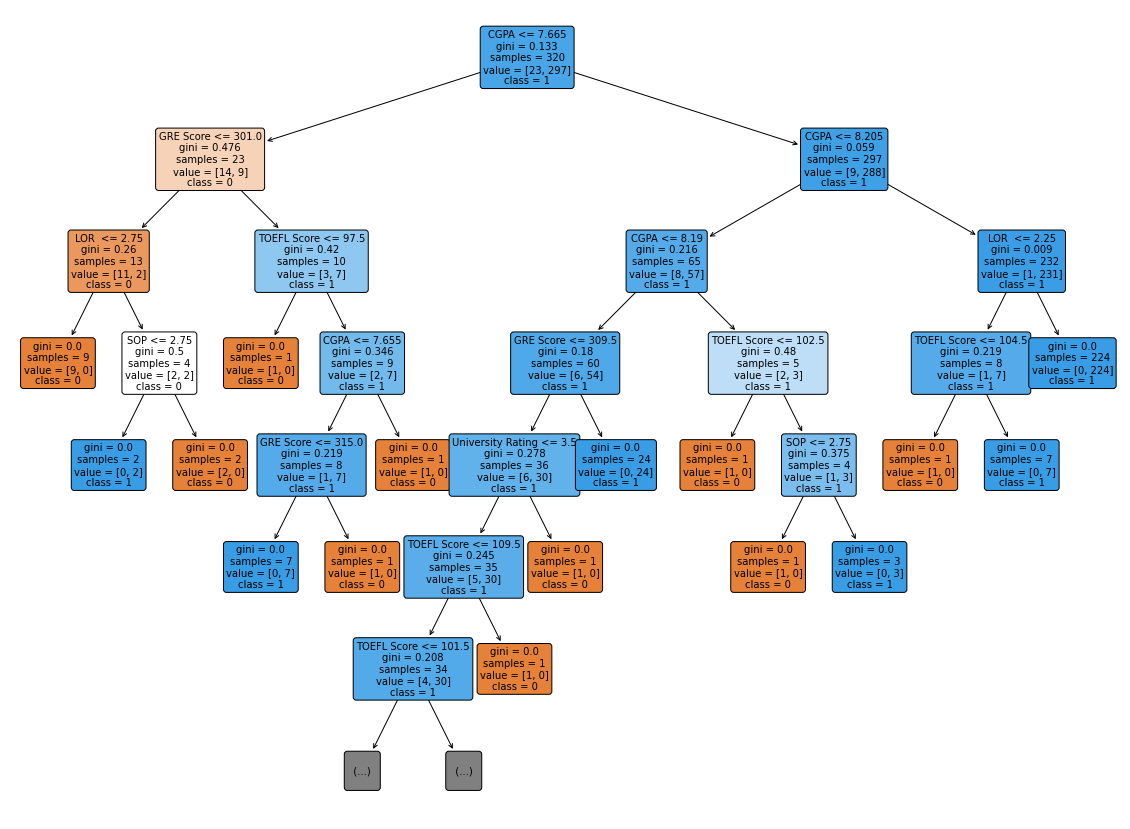

In [26]:
plt.figure(figsize=(20,15))
from sklearn.tree import plot_tree
plot_tree(model, 
          feature_names = features, 
          max_depth=6,
          class_names=['0','1'],
          filled = True, 
          rounded = True,
         fontsize=10)

# Creating confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,x_pred)

array([[ 4,  6],
       [ 4, 66]], dtype=int64)

# Calculating accuracy metrics

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test,x_pred))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.92      0.94      0.93        70

    accuracy                           0.88        80
   macro avg       0.71      0.67      0.69        80
weighted avg       0.86      0.88      0.87        80



# Calculating accuracy for given model

In [29]:
print("Accuracy: ",metrics.accuracy_score(y_test, x_pred))

Accuracy:  0.875
